In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import torch
import os

import sys
sys.path.insert(0, '../trainingdata')
from datasaver import *
sys.path.insert(0, '../testproblems/tdarcy')
from manufacturedsolutions import *
sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from NeuralOperator import NeuralOperator
from customlosses import *
from quadrature import *
from customlayers import discretize_functions
from basisfunctions import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from NeuralOperator import NeuralOperator

logdir = '../../../nnlogs'
device = 'cuda:3'


sublogdir = 'test'
model = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
model.hparams['n_timesteps'] = 1

values = [1,2,3,4,5]

N_samples = 1
l_min = [1,1,1]
l_max = [1,1,1]

alpha = 0.05
q_low = alpha/2
q_high = 1 - q_low

quadrature = GaussLegendreQuadrature(n_elements=[1,3,3], Q=[33,99,99])
x = quadrature.xi
x_scaled = np.copy(x)
x_scaled[:,0] = x_scaled[:,0]*model.hparams['Dt']
w = quadrature.w
w = w*model.hparams['Dt']

torch.float64
torch.float64
torch.float64
torch.float64
torch.float64


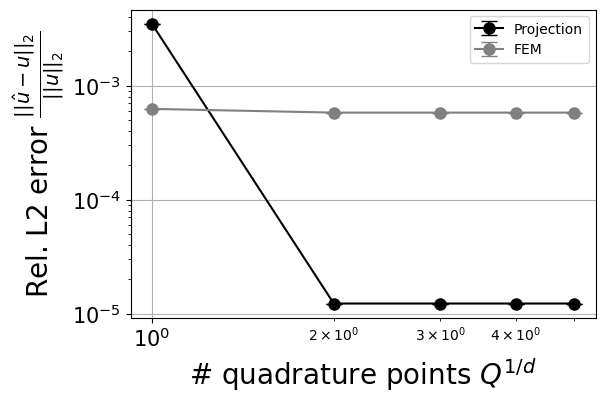

In [4]:
linestyles = ['-','--','--','--','--']
colors = ['C0','C1','C2','C1','C2','C2','C4','C5','C6']

dataset = ManufacturedSolutionsSet(N_samples=N_samples, variables=['t','x','x'], l_min=l_min, l_max=l_max)
theta = dataset.theta
f = dataset.f
eta_yL = dataset.etat
eta_y0 = dataset.etab
g_x0 = dataset.gl
g_xL = dataset.gr
u = dataset.u
u0 = dataset.u0

size_title = 20
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

L2_scaled_avg = np.zeros((len(values)))
yerr = np.zeros((2,len(values)))
for i in range(len(values)):
    model.hparams['modeltype'] = 'projection'
    model.hparams['dtype'] = torch.float64
    model.hparams['precision'] = 64
    model.hparams['Q'] = (values[i],99,99)
    model.__init__(model.hparams)
    u_exact = discretize_functions(u, x_scaled)
    u_hat = model.simforward(theta, f, eta_y0, eta_yL, g_x0, g_xL, u0, x, u)
    L2_scaled_array = weightedrelativeL2_set(w, u_hat, u_exact)
    L2_scaled_avg[i] = np.average(L2_scaled_array)
    q_l = np.quantile(L2_scaled_array, q_low)
    q_h = np.quantile(L2_scaled_array, q_high)
    yerr[:,i] = np.array([L2_scaled_avg[i] - q_l, -L2_scaled_avg[i] + q_h])

ax.errorbar(values, L2_scaled_avg, yerr=yerr,  capsize=6, ms=8, label='Projection', color='black', linestyle='-', marker='o')

L2_scaled_avg = np.zeros((len(values)))
yerr = np.zeros((2,len(values)))
for i in range(len(values)):
    model.hparams['modeltype'] = 'FEM'
    model.hparams['dtype'] = torch.float64
    model.hparams['precision'] = 64
    model.hparams['Q'] = (values[i],99,99)
    model.__init__(model.hparams)
    u_exact = discretize_functions(u, x_scaled)
    u_hat = model.simforward(theta, f, eta_y0, eta_yL, g_x0, g_xL, u0, x, u)
    L2_scaled_array = weightedrelativeL2_set(w, u_hat, u_exact)
    L2_scaled_avg[i] = np.average(L2_scaled_array)
    q_l = np.quantile(L2_scaled_array, q_low)
    q_h = np.quantile(L2_scaled_array, q_high)
    yerr[:,i] = np.array([L2_scaled_avg[i] - q_l, -L2_scaled_avg[i] + q_h])

ax.errorbar(values, L2_scaled_avg, yerr=yerr,  capsize=6, ms=8, label='FEM', color='grey', linestyle='-', marker='o')

ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.set_title(r'$0.5<\lambda<1$', fontsize=size_title)
ax.set_xlabel(r'# quadrature points $Q^{1/d}$', fontsize=size_axeslabels)
ax.set_ylabel(r'Rel. L2 error $\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-6,1e1)
ax.grid()
plt.legend(fontsize=10)
plt.savefig("Qtime.svg", bbox_inches='tight')#, transparent=True)
plt.show()

In [7]:
from NeuralOperator import NeuralOperator

logdir = '../../../nnlogs'
device = 'cuda:3'


sublogdir = 'test'
model = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
model.hparams['n_timesteps'] = 1

values = [4,5,6,7,8,9,10,11,12]

N_samples = 1
l_min = [0.05,0.05,0.05]
l_max = [0.05,0.05,0.05]

alpha = 0.05
q_low = alpha/2
q_high = 1 - q_low

quadrature = GaussLegendreQuadrature(n_elements=[1,3,3], Q=[33,99,99])
x = quadrature.xi
x_scaled = np.copy(x)
x_scaled[:,0] = x_scaled[:,0]*model.hparams['Dt']
w = quadrature.w
w = w*model.hparams['Dt']

In [ ]:
linestyles = ['-','--','--','--','--']
colors = ['C0','C1','C2','C1','C2','C2','C4','C5','C6']

dataset = ManufacturedSolutionsSet(N_samples=N_samples, variables=['t','x','x'], l_min=l_min, l_max=l_max)
theta = dataset.theta
f = dataset.f
eta_yL = dataset.etat
eta_y0 = dataset.etab
g_x0 = dataset.gl
g_xL = dataset.gr
u = dataset.u
u0 = dataset.u0

size_title = 20
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

L2_scaled_avg = np.zeros((len(values)))
yerr = np.zeros((2,len(values)))
for i in range(len(values)):
    model.hparams['modeltype'] = 'projection'
    model.hparams['dtype'] = torch.float64
    model.hparams['precision'] = 64
    model.hparams['Q'] = (99,3*values[i],3*values[i])
    model.__init__(model.hparams)
    u_exact = discretize_functions(u, x_scaled)
    u_hat = model.simforward(theta, f, eta_y0, eta_yL, g_x0, g_xL, u0, x, u)
    L2_scaled_array = weightedrelativeL2_set(w, u_hat, u_exact)
    L2_scaled_avg[i] = np.average(L2_scaled_array)
    q_l = np.quantile(L2_scaled_array, q_low)
    q_h = np.quantile(L2_scaled_array, q_high)
    yerr[:,i] = np.array([L2_scaled_avg[i] - q_l, -L2_scaled_avg[i] + q_h])

ax.errorbar(3*np.array(values), L2_scaled_avg, yerr=yerr,  capsize=6, ms=8, label='Projection', color='black', linestyle='-', marker='o')

L2_scaled_avg = np.zeros((len(values)))
yerr = np.zeros((2,len(values)))
for i in range(len(values)):
    model.hparams['modeltype'] = 'FEM'
    model.hparams['dtype'] = torch.float64
    model.hparams['precision'] = 64
    model.hparams['Q'] = (99,3*values[i],3*values[i])
    model.__init__(model.hparams)
    u_exact = discretize_functions(u, x_scaled)
    u_hat = model.simforward(theta, f, eta_y0, eta_yL, g_x0, g_xL, u0, x, u)
    L2_scaled_array = weightedrelativeL2_set(w, u_hat, u_exact)
    L2_scaled_avg[i] = np.average(L2_scaled_array)
    q_l = np.quantile(L2_scaled_array, q_low)
    q_h = np.quantile(L2_scaled_array, q_high)
    yerr[:,i] = np.array([L2_scaled_avg[i] - q_l, -L2_scaled_avg[i] + q_h])

ax.errorbar(3*np.array(values), L2_scaled_avg, yerr=yerr,  capsize=6, ms=8, label='FEM', color='grey', linestyle='-', marker='o')

ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.set_title(r'$0.5<\lambda<1$', fontsize=size_title)
ax.set_xlabel(r'# quadrature points $Q^{1/d}$', fontsize=size_axeslabels)
ax.set_ylabel(r'Rel. L2 error $\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-6,1e1)
ax.grid()
plt.legend(fontsize=10)
plt.savefig("Qspace.svg", bbox_inches='tight')#, transparent=True)
plt.show()